In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as plt
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('mobile_price.csv')

In [4]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.shape

(2000, 21)

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

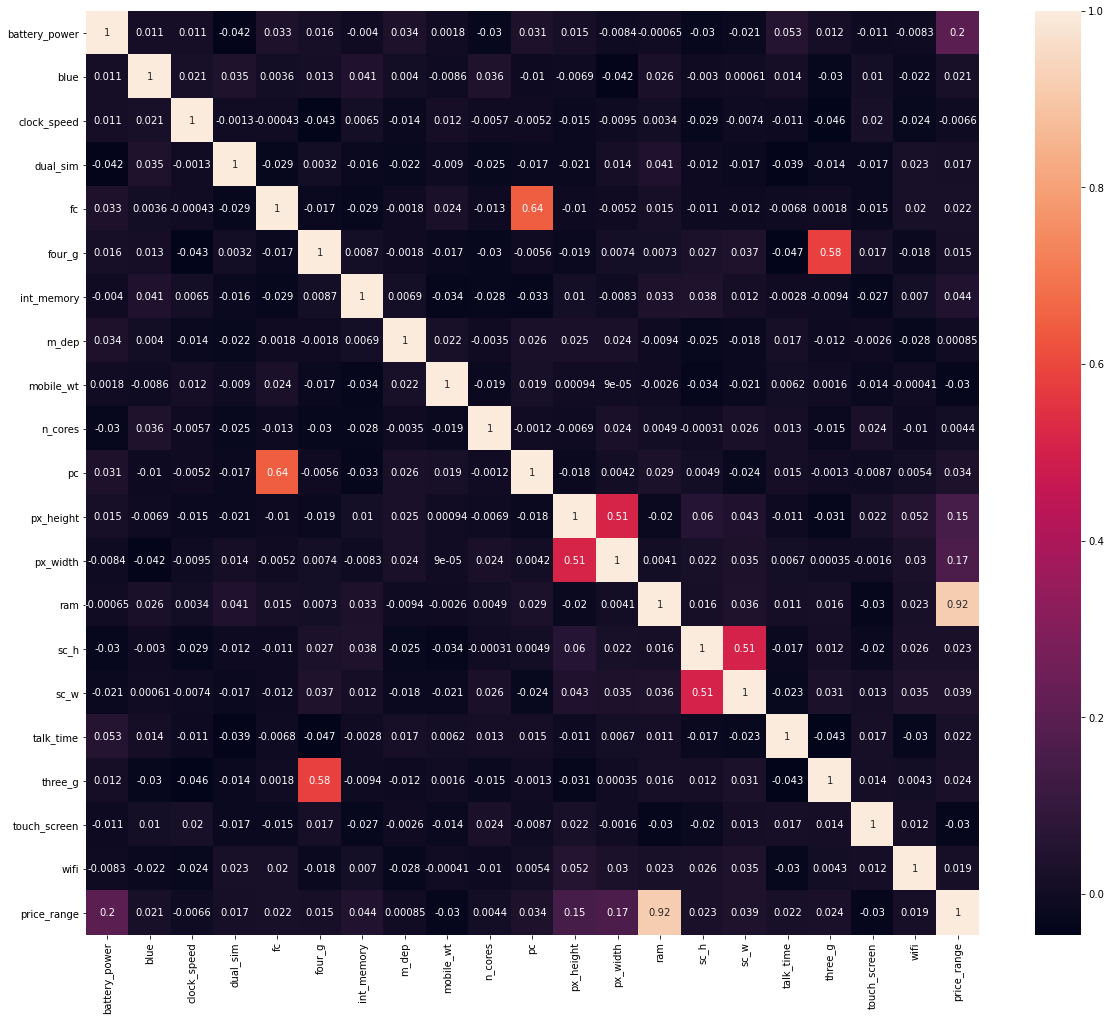

In [18]:
plt.subplots(figsize=(20,17))
sns.heatmap(df.corr(),annot=True)

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

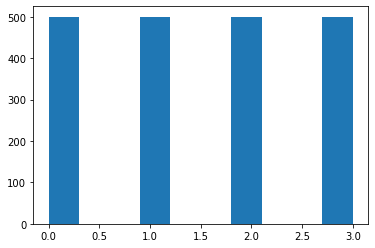

In [16]:
plt.hist('price_range',data=df)

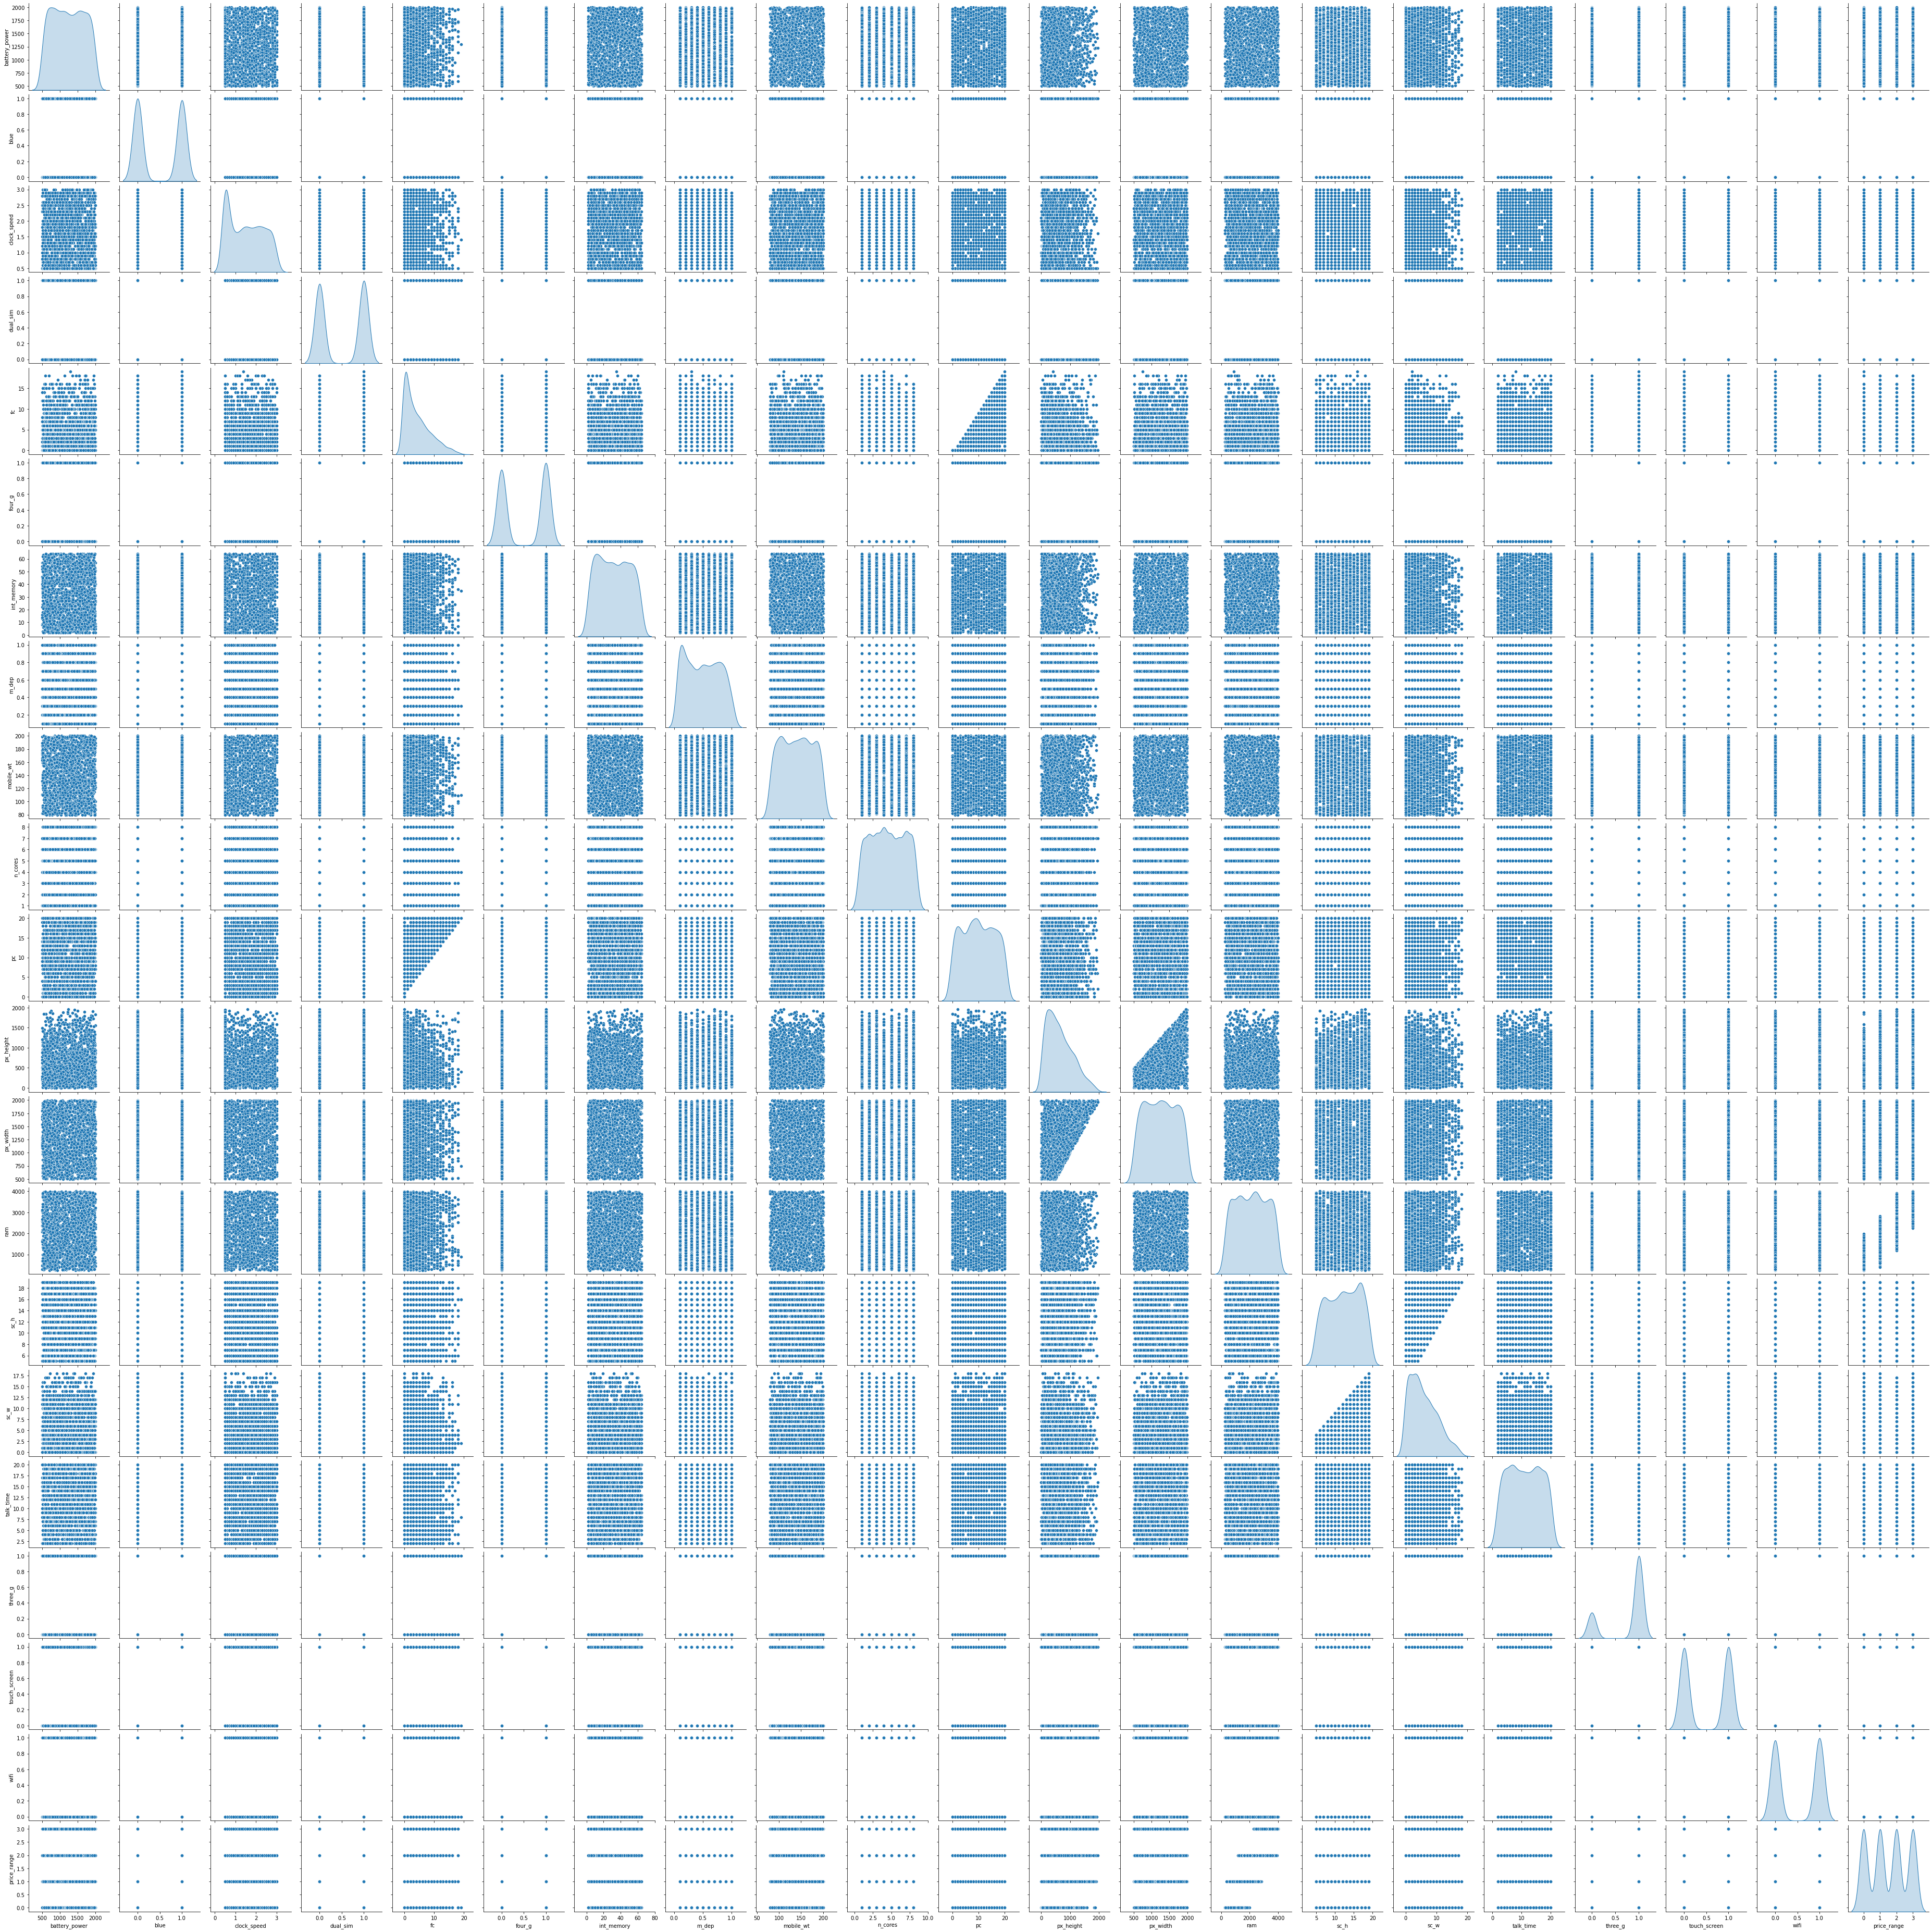

In [20]:
sns.pairplot(df,diag_kind='kde')

In [21]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x=df.drop(['price_range'],axis=1)

In [25]:
y=df['price_range']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [27]:
x_train.shape

(1400, 20)

In [28]:
y_train.shape

(1400,)

In [33]:
x_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [38]:
y_train.count()

1400

In [42]:
print("Test mobile low cost Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 
                                                                    (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Test mobile low cost Values        : 135 (22.50%)


In [43]:
print("Test mobile medium Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))

Test mobile medium Values        : 149 (24.83%)


In [37]:
from sklearn.naive_bayes import GaussianNB

In [44]:
Mobile_model = GaussianNB()

In [45]:
Mobile_model.fit(x_train, y_train.ravel())

GaussianNB()

In [48]:
Mobile_train_predict = Mobile_model.predict(x_train)

In [49]:
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, Mobile_train_predict)))
print()

Model Accuracy: 0.8229



In [52]:
Mobile_test_predict = Mobile_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, Mobile_test_predict)))
print()

Model Accuracy: 0.7783

